# Correlation between BTC and ETH

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Grab Data

In [2]:
tickers = yf.Tickers("BTC-GBP ETH-GBP")

In [3]:
data = {}
for t in tickers.tickers:
    data[t.info['name']] = t.history(start='2019-09-18', end='2021-02-08')

In [4]:
data['Bitcoin'].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-18,8197.314453,8239.856445,8172.131836,8177.567383,12965489944,0,0
2019-09-19,8179.369629,8220.402344,7865.916016,8197.044922,15918910635,0,0
2019-09-20,8196.967773,8246.955078,8123.733398,8163.385254,11813504898,0,0
2019-09-21,8164.994629,8168.562012,8018.317871,8033.558594,10764043294,0,0
2019-09-22,8037.084961,8079.069824,7957.246582,8075.819824,10585289084,0,0


In [5]:
data['Ethereum'].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-18,166.421753,173.772278,166.827454,169.507614,7372809666,0,0
2019-09-19,169.390701,177.948105,163.427887,176.677933,8479415079,0,0
2019-09-20,176.509293,177.672180,172.509628,174.827087,6436629073,0,0
2019-09-21,174.704666,177.158844,172.381760,172.795502,6208392197,0,0
2019-09-22,172.771744,173.287552,166.518143,169.646072,6265417160,0,0


## Explore Correlations of Returns

**Training data**: 2019-09-18 to 2020-10-31, **Test data**: 2020-11-01 - 2021-02-08

In [15]:
btc, eth = data['Bitcoin'][:'2020-11-01'].Close, data['Ethereum'][:'2020-11-01'].Close
btc.name, eth.name = 'Bitcoin', 'Ethereum'

In [16]:
btc_returns = btc.pct_change()
eth_returns = eth.pct_change()

Text(0.5, 1.0, 'BTC & ETH Returns')

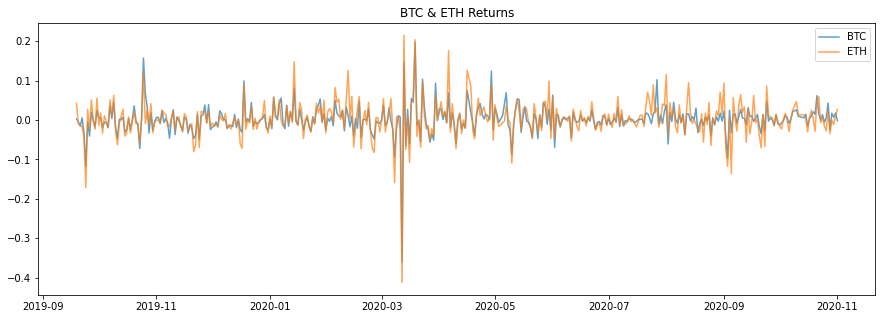

In [25]:
plt.figure(figsize=(15,5))
plt.plot(btc_returns, label='BTC', alpha=0.7)
plt.plot(eth_returns, label='ETH', alpha=0.7)
plt.legend()
plt.title('BTC & ETH Returns')

A 1 std move in bitcoin is equivalent to a 0.8std move in ethereum. However correlation does not neccesarily mean btc and eth would be good for pair trading.

In [26]:
pd.concat([btc_returns,eth_returns], axis=1).corr().loc['Bitcoin','Ethereum']

0.8676920131172922

What we need to identify if they are cointegrated by looking at the spread and seeing how it varies with time

In [21]:
period = 30
beta = btc.rolling(period).mean() / eth.rolling(period).mean()
spread = btc - beta*eth
normalized_spread = (spread - spread.rolling(period).mean())/spread.rolling(period).std()

It would appear that the spread is consistently returning to the mean.

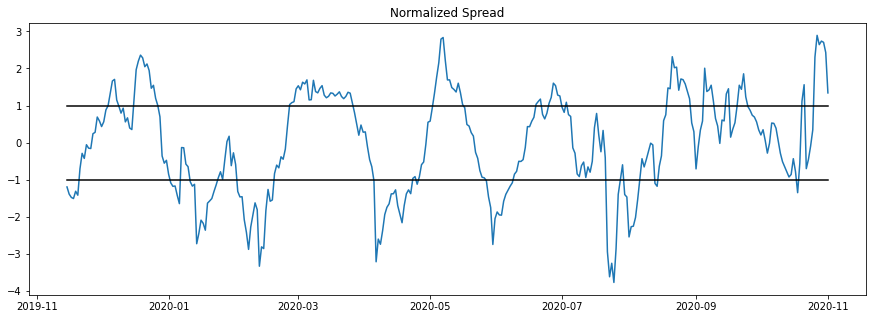

In [42]:
not_na = normalized_spread[normalized_spread.notna()]
up = pd.Series(np.repeat(1,len(not_na)),index=not_na.index)
low = pd.Series(np.repeat(-1,len(not_na)),index=not_na.index)
plt.figure(figsize=(15,5))
plt.title('Normalized Spread')
plt.plot(normalized_spread)
plt.plot(up, color='black')
plt.plot(low, color='black')

# End